In [4]:
%run setup.py

In [5]:
%config IPython.matplotlib.backend = "retina"


In [6]:
from astropy import constants as const
import astropy.units as u
from maelstrom.utils import mass_function

In [7]:
P, a1 = np.loadtxt('../data/pb1_binaries.txt', usecols=(1, 4), skiprows=1).T

# Cut out bad points..
planet = (a1 < 10) & (P > 800)

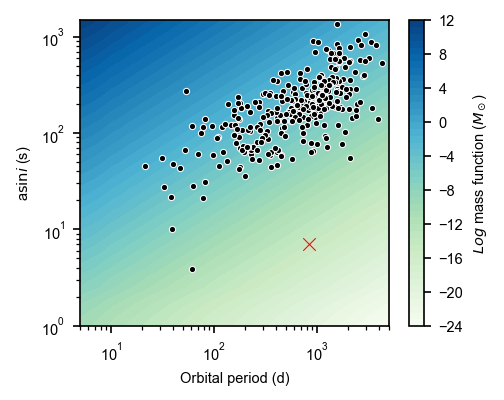

In [8]:
plt.figure(figsize=[3.33,2.7])

asinis = np.linspace(1,1500,1000) * u.s
periods = np.linspace(5,5000,1000) * u.d
X, Y = np.meshgrid(periods, asinis)
mfs = mass_function(X, Y)

plt.contourf(X, Y, np.log(mfs.value), levels=50, cmap='GnBu')
cbar = plt.colorbar(label=r'$Log$ mass function ($M_\odot$)')
#plt.scatter(840, 7.1, c='green')
plt.scatter(P[~planet], a1[~planet], marker='.', facecolors='black', edgecolors='white', alpha=1, linewidth=0.5, rasterized=True)
plt.scatter(P[planet], a1[planet], marker='x', facecolors='red', edgecolors='black', alpha=1, linewidth=0.5, rasterized=True)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Orbital period (d)')
plt.ylabel(r'a$\sin{i}$ (s)')
plt.ylim(10**0, None)
poss = [(a1 < 10) & (P > 100)]

cbar.ax.tick_params(labelsize=7)

# plt.savefig(overleaf_path + 'known_binaries2.pdf', dpi=300, bbox_inches='tight', pad_inches=0)